### Importing:

In [112]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('Cleaned_2.csv')




### Data exploration:

In [113]:
df.shape

(30554, 27)

In [114]:
print(df.head())

        id           city  postal_code  district       province     price  \
0  1882546       wenduine         8420   oostend  west flanders  163000.0   
1  2784938  heist-aan-zee         8301    brugge  west flanders  108000.0   
2  6675519       zonhoven         3520   hasselt        limburg  392422.0   
3  7066131        bredene         8450   oostend  west flanders  245000.0   
4  7222190           geel         2440  turnhout        antwerp  335527.0   

    subtype state_construction  living_area  terrace_area  ...  has_garden  \
0    CHALET             AS_NEW         62.0           NaN  ...         1.0   
1  BUNGALOW             AS_NEW         51.0           NaN  ...         1.0   
2     HOUSE                NaN        206.0           NaN  ...         1.0   
3     HOUSE             AS_NEW         76.0           NaN  ...         1.0   
4     HOUSE                NaN        160.0           NaN  ...         NaN   

   kitchen  fireplace  swimmingpool  has_terrace  has_attic  has_bas

In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30554 entries, 0 to 30553
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30554 non-null  int64  
 1   city                30554 non-null  object 
 2   postal_code         30554 non-null  int64  
 3   district            30554 non-null  object 
 4   province            30554 non-null  object 
 5   price               30554 non-null  float64
 6   subtype             30554 non-null  object 
 7   state_construction  22609 non-null  object 
 8   living_area         30554 non-null  float64
 9   terrace_area        8151 non-null   float64
 10  garden_area         9442 non-null   float64
 11  rooms               8961 non-null   float64
 12  bedrooms            30357 non-null  float64
 13  bathrooms           27831 non-null  float64
 14  livingroom_surface  13661 non-null  float64
 15  kitchen_surface     12493 non-null  float64
 16  faca

In [116]:
print(df.describe())

                 id   postal_code         price   living_area  terrace_area  \
count  3.055400e+04  30554.000000  3.055400e+04  30554.000000   8151.000000   
mean   1.096415e+07   5508.566931  4.779180e+05    210.707796     35.430254   
std    2.478613e+05   2913.700150  5.416840e+05    199.245169     71.943267   
min    1.882546e+06   1000.000000  2.500000e+03      7.000000      1.000000   
25%    1.090496e+07   2812.000000  2.590000e+05    140.000000     15.000000   
50%    1.103902e+07   5190.000000  3.690000e+05    177.000000     25.000000   
75%    1.111201e+07   8510.000000  5.200000e+05    232.000000     40.000000   
max    1.115769e+07   9992.000000  1.500000e+07  19772.000000   3466.000000   

         garden_area        rooms      bedrooms     bathrooms  \
count    9442.000000  8961.000000  30357.000000  27831.000000   
mean      854.927770     8.559313      3.504661      1.396357   
std      4226.797493     6.059570      1.418314      0.899131   
min         1.000000     1.0

In [117]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [118]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                        0
city                      0
postal_code               0
district                  0
province                  0
price                     0
subtype                   0
state_construction     7945
living_area               0
terrace_area          22403
garden_area           21112
rooms                 21593
bedrooms                197
bathrooms              2723
livingroom_surface    16893
kitchen_surface       18061
facades                5922
has_garden            18970
kitchen               12281
fireplace             24488
swimmingpool          29435
has_terrace           14549
has_attic             21412
has_basement          18402
construction_year     12156
epc                    5485
area_total                0
dtype: int64


### Data preprocessing:

In [119]:
nan_df = df.isnull()
nan_atrtribute = nan_df.sum()
# Drop the columns that have more than 1000 missing values
columns_to_drop = nan_atrtribute[nan_atrtribute > 10000].index

df_cleaned = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(columns_to_drop)
df_cleaned.head()

Index(['terrace_area', 'garden_area', 'rooms', 'livingroom_surface',
       'kitchen_surface', 'has_garden', 'kitchen', 'fireplace', 'swimmingpool',
       'has_terrace', 'has_attic', 'has_basement', 'construction_year'],
      dtype='object')


,id,city,postal_code,district,province,price,subtype,state_construction,living_area,bedrooms,bathrooms,facades,epc,area_total
0,1882546,wenduine,8420,oostend,west flanders,163000.0,CHALET,AS_NEW,62.0,2.0,1.0,4.0,NaN,155.0
1,2784938,heist-aan-zee,8301,brugge,west flanders,108000.0,BUNGALOW,AS_NEW,51.0,2.0,1.0,4.0,NaN,170.0
2,6675519,zonhoven,3520,hasselt,limburg,392422.0,HOUSE,NaN,206.0,3.0,1.0,NaN,NaN,370.0
3,7066131,bredene,8450,oostend,west flanders,245000.0,HOUSE,AS_NEW,76.0,2.0,1.0,4.0,B,150.0
4,7222190,geel,2440,turnhout,antwerp,335527.0,HOUSE,NaN,160.0,3.0,NaN,NaN,NaN,431.0


In [120]:
print(df_cleaned.dtypes)

id                      int64
city                   object
postal_code             int64
district               object
province               object
price                 float64
subtype                object
state_construction     object
living_area           float64
bedrooms              float64
bathrooms             float64
facades               float64
epc                    object
area_total            float64
dtype: object


In [121]:
# Transpose the data frame so that it fits in a cell
df_cleaned.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30554.0,NaN,NaN,NaN,10964147.361393,247861.272386,1882546.0,10904960.75,11039024.5,11112010.5,11157693.0
city,30554,3168,gent,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,30554.0,NaN,NaN,NaN,5508.566931,2913.70015,1000.0,2812.0,5190.0,8510.0,9992.0
district,30554,43,antwerp,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,30554,11,east flanders,5087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,30554.0,NaN,NaN,NaN,477917.990836,541683.95801,2500.0,259000.0,369000.0,520000.0,15000000.0
subtype,30554,8,HOUSE,25367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_construction,22609,6,GOOD,10296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,30554.0,NaN,NaN,NaN,210.707796,199.245169,7.0,140.0,177.0,232.0,19772.0
bedrooms,30357.0,NaN,NaN,NaN,3.504661,1.418314,1.0,3.0,3.0,4.0,70.0


In [122]:
def drop_specified_columns(df):
    """Drop specified columns."""
    df.drop(
        ["id", "city", "postal_code", "province", "subtype", "facades",], axis=1, inplace=True
    )
    return df

In [123]:
df=drop_specified_columns(df_cleaned)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
district,30554,43,antwerp,2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,30554.0,NaN,NaN,NaN,477917.990836,541683.95801,2500.0,259000.0,369000.0,520000.0,15000000.0
state_construction,22609,6,GOOD,10296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,30554.0,NaN,NaN,NaN,210.707796,199.245169,7.0,140.0,177.0,232.0,19772.0
bedrooms,30357.0,NaN,NaN,NaN,3.504661,1.418314,1.0,3.0,3.0,4.0,70.0
bathrooms,27831.0,NaN,NaN,NaN,1.396357,0.899131,1.0,1.0,1.0,2.0,25.0
epc,25069,12,F,5033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_total,30554.0,NaN,NaN,NaN,1400.142076,11028.815667,1.0,232.0,493.0,996.0,950774.0


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'area_total'}>, <Axes: >]], dtype=object)

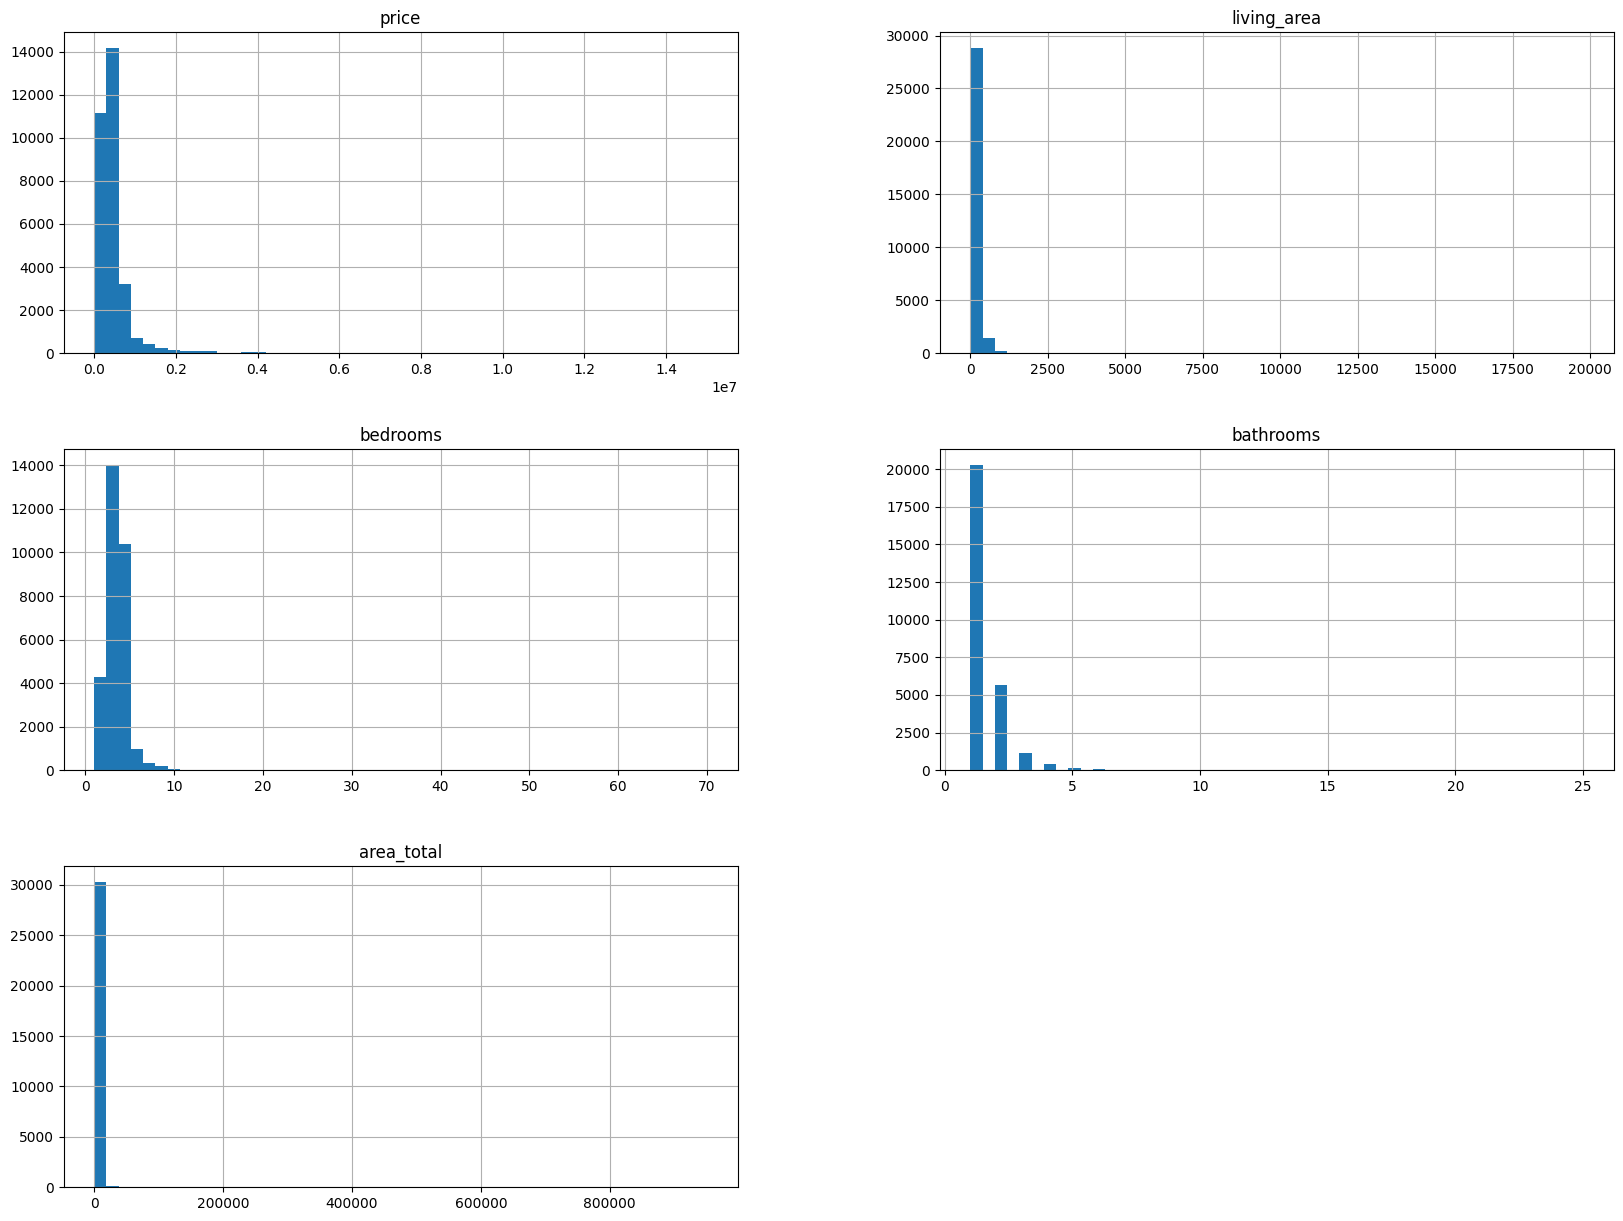

In [124]:
df.hist(bins=50, figsize=(20,15))

In [125]:
df.columns

Index(['district', 'price', 'state_construction', 'living_area', 'bedrooms',
       'bathrooms', 'epc', 'area_total'],
      dtype='object')

In [126]:
df.isnull().sum()

district                 0
price                    0
state_construction    7945
living_area              0
bedrooms               197
bathrooms             2723
epc                   5485
area_total               0
dtype: int64

In [131]:
df.dropna(subset=['bedrooms'], inplace=True)
df['bathrooms'] = df['bathrooms'].fillna(1)

In [135]:
from sklearn.preprocessing import OneHotEncoder


In [137]:
df.head

<bound method NDFrame.head of           district     price state_construction  living_area  bedrooms  \
0          oostend  163000.0             AS_NEW         62.0       2.0   
1           brugge  108000.0             AS_NEW         51.0       2.0   
2          hasselt  392422.0                NaN        206.0       3.0   
3          oostend  245000.0             AS_NEW         76.0       2.0   
4         turnhout  335527.0                NaN        160.0       3.0   
...            ...       ...                ...          ...       ...   
30549      antwerp  499000.0     JUST_RENOVATED        293.0       8.0   
30550      antwerp  535000.0      TO_BE_DONE_UP        201.0       3.0   
30551      antwerp  569000.0               GOOD        155.0       3.0   
30552      antwerp  429000.0               GOOD        143.0       3.0   
30553  dendermonde  395000.0             AS_NEW        170.0       3.0   

       bathrooms  epc  area_total  
0            1.0  NaN       155.0  
1        

In [136]:
df.isnull().sum()

district                 0
price                    0
state_construction    7858
living_area              0
bedrooms                 0
bathrooms                0
epc                   5421
area_total               0
dtype: int64

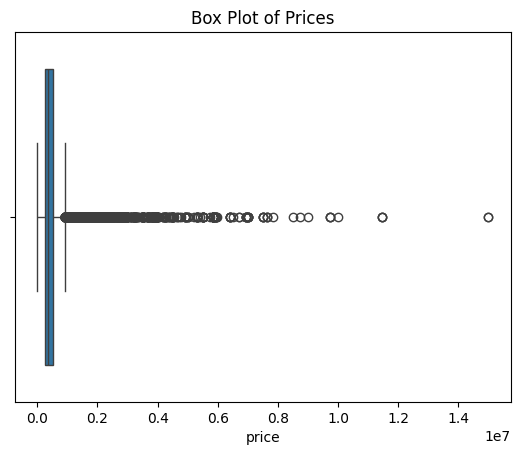

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'price' column
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [142]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Number of outliers detected: {len(outliers)}")
print(lower_bound, upper_bound)

Number of outliers detected: 1953
-132500.0 911500.0


In [144]:
df['price'].min()

2500.0

In [151]:
# Filter the DataFrame to keep only rows where 'price' is within the specified range
df = df[(df['price'] >= 40000) & (df['price'] <= 1000000)]
df.shape

(28744, 8)

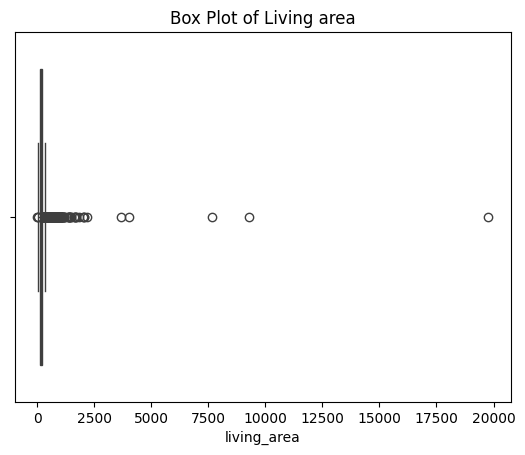

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'price' column
sns.boxplot(x=df['living_area'])
plt.title('Box Plot of Living area')
plt.show()

In [156]:
# Calculate Q1, Q3, and IQR
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound_area = Q1 - 1.5 * IQR
upper_bound_area = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['living_area'] < lower_bound_area) | (df['living_area'] > upper_bound_area)]

print(f"Number of outliers detected: {len(outliers)}")
print(lower_bound_area, upper_bound_area)

Number of outliers detected: 1582
20.0 340.0


In [158]:
df = df[(df['living_area'] >= lower_bound_area) &
                 (df['living_area'] <= upper_bound_area)]

In [159]:
df.shape

(27162, 8)

In [160]:
df.isnull().sum()

district                 0
price                    0
state_construction    7097
living_area              0
bedrooms                 0
bathrooms                0
epc                   5078
area_total               0
dtype: int64

In [162]:
df.state_construction.unique()

array(['AS_NEW', nan, 'GOOD', 'JUST_RENOVATED', 'TO_RENOVATE',
       'TO_BE_DONE_UP', 'TO_RESTORE'], dtype=object)

In [128]:
df['state_construction'].value_counts()

state_construction
GOOD              10296
AS_NEW             4493
TO_RENOVATE        3914
TO_BE_DONE_UP      2587
JUST_RENOVATED     1079
TO_RESTORE          240
Name: count, dtype: int64

In [78]:
df['bathrooms'].value_counts()

bathrooms
1.0     20291
2.0      5658
3.0      1148
4.0       386
5.0       168
6.0        84
7.0        31
8.0        21
10.0       10
9.0        10
12.0        6
11.0        5
13.0        3
15.0        2
14.0        2
20.0        1
16.0        1
23.0        1
18.0        1
25.0        1
22.0        1
Name: count, dtype: int64

In [47]:
df.epc.unique()

array([nan, 'B', 'E', 'A', 'C', 'F', 'G', 'D', 'A++', 'A+_A++', 'A+',
       'A_A+', 'F_E'], dtype=object)

In [55]:
df['epc'].value_counts()

epc
F         5033
C         4635
D         4562
B         3533
E         3422
G         1821
A         1591
A+         303
A++        163
A+_A++       3
A_A+         2
F_E          1
Name: count, dtype: int64

In [41]:
numerical_cols = ['price', 'living_area',
                  'bedrooms', 'bathrooms', 'area_total']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()
correlation_matrix

,price,living_area,bedrooms,bathrooms,area_total
price,1.000000,0.432517,0.381194,0.510769,0.161336
living_area,0.432517,1.000000,0.459353,0.384144,0.112839
bedrooms,0.381194,0.459353,1.000000,0.589382,0.096024
bathrooms,0.510769,0.384144,0.589382,1.000000,0.080275
area_total,0.161336,0.112839,0.096024,0.080275,1.000000


In [50]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 province                 0
price                    0
state_construction    7945
living_area              0
bedrooms               197
bathrooms             2723
epc                   5485
area_total               0
dtype: int64


30554